In [1]:
import os
import scanpy as sc
import pandas as pd
#import squidpy as sq


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
!pwd

## Creating folders to write outputs
folder_objects = './output_dataobjects'
folder_figs = './figures'

# Make the directories. 
os.makedirs(folder_objects, exist_ok=True) #exist_ok=True to prevent error if dir already exists.
os.makedirs(folder_figs, exist_ok=True)

/data/projects/zeba/MY_PROJECTS/240130_Xenium_ANCA_SLE_GBM/xenium-cgn/notebooks_zs/01_SampleAnnotation


In [3]:
adata = sc.read_h5ad('/data/projects/robin/segmentation/xenium_outs/merged_raw.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 4195109 × 480
    obs: 'x', 'y', 'z', 'cluster', 'n_transcripts', 'density', 'elongation', 'area', 'avg_confidence', 'avg_assignment_confidence', 'max_cluster_frac', 'lifespan', 'x_centroid', 'y_centroid', 'cell_area', 'Slide_ID', 'batch'
    var: 'gene_ids', 'feature_types'
    obsm: 'spatial'

In [5]:
adata.obs.head()

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,max_cluster_frac,lifespan,x_centroid,y_centroid,cell_area,Slide_ID,batch
cell_CRfb095a77d-1,2285.790178,1164.057381,32.829188,1,79,2.024,2.141,39.03,0.9975,0.9916,0.949367,50,2285.790178,1164.057381,39.03,0011695,0
cell_CRfb095a77d-2,2298.342622,1219.741069,31.465535,4,32,1.085,4.614,29.50,0.9771,0.9288,1.000000,50,2298.342622,1219.741069,29.50,0011695,0
cell_CRfb095a77d-3,2271.434052,1245.859500,32.062796,2,67,3.059,2.990,21.90,0.9971,0.9884,0.880597,50,2271.434052,1245.859500,21.90,0011695,0
cell_CRfb095a77d-5,2257.346907,1259.955827,31.273945,2,56,2.142,9.229,26.14,0.9964,0.9707,0.767857,50,2257.346907,1259.955827,26.14,0011695,0
cell_CRfb095a77d-6,2277.712022,1237.595244,35.395148,2,9,1.698,3.283,5.30,0.9826,0.9400,0.888889,50,2277.712022,1237.595244,5.30,0011695,0


In [6]:
Slide_IDs = adata.obs.Slide_ID.unique()
Slide_IDs

['0011695', '0018775', '0011707', '0011287', '0011762', '0011284', '0011546', '0011216']
Categories (8, object): ['0011216', '0011284', '0011287', '0011546', '0011695', '0011707', '0011762', '0018775']

In [7]:
# Function to plot the coordinates of a given slide
# Was used to get teh x and y borders of the samples
def plot_slide_coordinates(data, slide_id, save_path="./figures"):
    # Filter the data for the given Slide_ID
    slide_data = data[data.obs["Slide_ID"] == slide_id]
    
    # Extract and invert the coordinates
    x, y = slide_data.obsm["spatial"][:,0][::-1], list(slide_data.obsm["spatial"][:,1])[::-1] 

    sns.set(style="whitegrid")# to get gridlines
    plt.figure(figsize=(5,10))
    ax = plt.subplot(1,1,1)
    ax.scatter(x, y, s=5) # s is for point size
    ax.invert_yaxis()
    plt.title(f'{slide_id}: x, y coordinates')
    
    # Save the plot
    plt.savefig(f"{save_path}/{slide_id}_xyCoordinates.png")
    plt.savefig(f"{save_path}/{slide_id}_xyCoordinates.pdf")
    plt.show()



In [8]:
# Function to plot  slide with sample borders and labels
def plot_slide_coordinates_sample_borders(data, slide_id, coordinates, save_path="./figures"):
    # Filter the data for the given Slide_ID
    slide_data = data[data.obs["Slide_ID"] == slide_id]
    
    # Extract and invert the coordinates
    x, y = slide_data.obsm["spatial"][:,0][::-1], list(slide_data.obsm["spatial"][:,1])[::-1] 

    plt.figure(figsize=(5, 10))
    ax = plt.subplot(1,1,1)
    ax.scatter(x, y, s=5) # s is for point size
    ax.invert_yaxis()
    plt.title(f'{slide_id}: x, y coordinates')
    
    # Draw borders and overlay name of each sample
    for sample_name, coords in coordinates.items():
        xmin = coords['xmin']
        xmax = coords['xmax']
        ymin = coords['ymin']
        ymax = coords['ymax']
        
        # Draw rectangle
        rect = plt.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
        # Overlay text
        ax.text((xmin + xmax) / 2, (ymin + ymax) / 2, sample_name,
                horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

    # Save the plot
    plt.savefig(f"{save_path}/{slide_id}_xyCoordinates_sample_borders.png")
    plt.savefig(f"{save_path}/{slide_id}_xyCoordinates_sample_borders.pdf")
    plt.show()

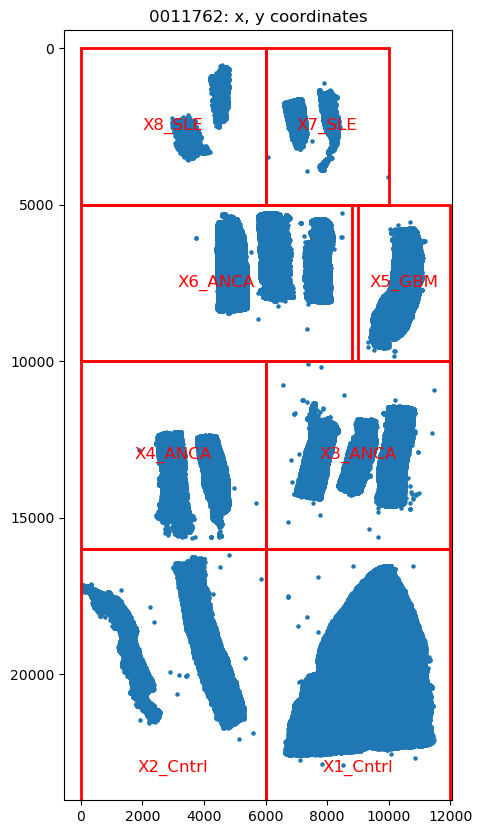

In [9]:
#plot_slide_coordinates(adata, '0011762')

slide_0011762_coordinates = {
    'X1_Cntrl': {'xmin': 6000, 'xmax': 12000, 'ymin': 16000, 'ymax': 30000},
    'X2_Cntrl': {'xmin': 0,    'xmax': 6000,  'ymin': 16000, 'ymax': 30000},
    'X3_ANCA':  {'xmin': 6000, 'xmax': 12000, 'ymin': 10000, 'ymax': 16000},
    'X4_ANCA':  {'xmin': 0,    'xmax': 6000,  'ymin': 10000, 'ymax': 16000},
    'X5_GBM':   {'xmin': 9000, 'xmax': 12000, 'ymin': 5000,  'ymax': 10000},
    'X6_ANCA':  {'xmin': 0,    'xmax': 8800,  'ymin': 5000,  'ymax': 10000},
    'X7_SLE':   {'xmin': 6000, 'xmax': 10000, 'ymin': 0,     'ymax': 5000 },
    'X8_SLE':   {'xmin': 0,    'xmax': 6000,  'ymin': 0,     'ymax': 5000 }
}
plot_slide_coordinates_sample_borders(adata, '0011762', slide_0011762_coordinates)

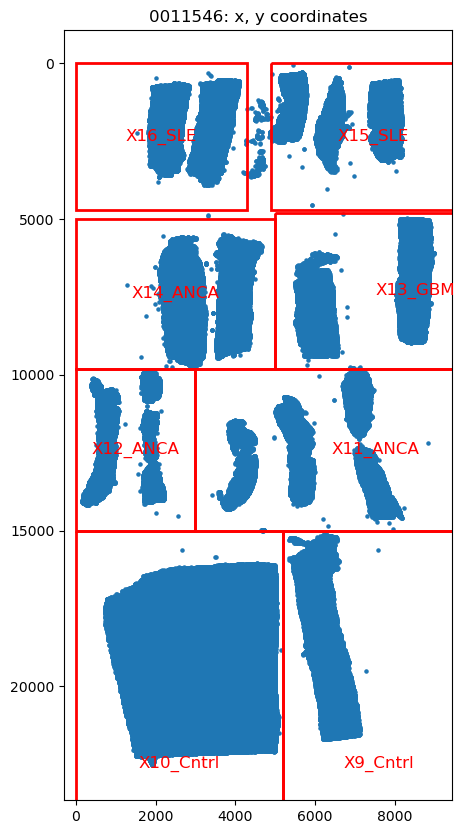

In [10]:
#plot_slide_coordinates(adata, '0011546')

slide_0011546_coordinates = {
    'X9_Cntrl':  {'xmin': 5200, 'xmax': 10000, 'ymin': 15000, 'ymax': 30000},
    'X10_Cntrl': {'xmin': 0,    'xmax': 5200,  'ymin': 15000, 'ymax': 30000},
    'X11_ANCA':  {'xmin': 3000, 'xmax': 12000, 'ymin': 9800,  'ymax': 15000},
    'X12_ANCA':  {'xmin': 0,    'xmax': 3000,  'ymin': 9800,  'ymax': 15000},
    'X13_GBM':   {'xmin': 5000, 'xmax': 12000, 'ymin': 4800,  'ymax': 9800 },
    'X14_ANCA':  {'xmin': 0,    'xmax': 5000,  'ymin': 5000,  'ymax': 9800 },
    'X15_SLE':   {'xmin': 4900, 'xmax': 10000, 'ymin': 0,     'ymax': 4700 },
    'X16_SLE':   {'xmin': 0,    'xmax': 4300,  'ymin': 0,     'ymax': 4700 }
}
plot_slide_coordinates_sample_borders(adata, '0011546', slide_0011546_coordinates)

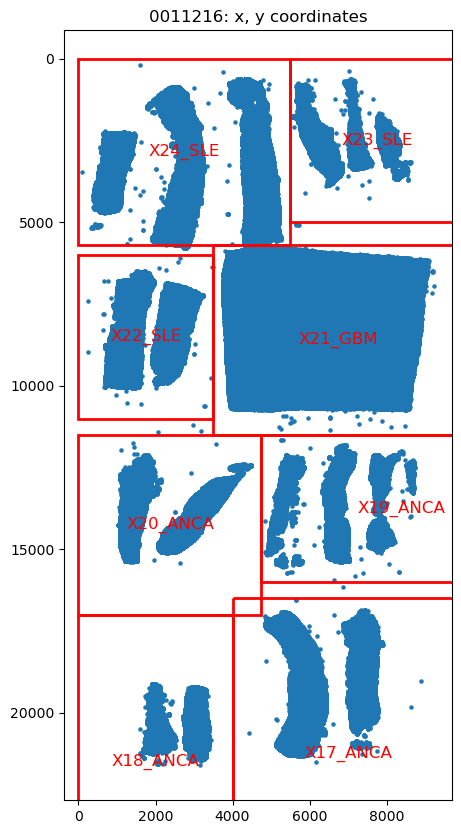

In [11]:
#plot_slide_coordinates(adata, '0011216')

slide_0011216_coordinates = {
    'X17_ANCA': {'xmin': 4000, 'xmax': 10000, 'ymin': 16500, 'ymax': 26000},
    'X18_ANCA': {'xmin': 0,    'xmax': 4000,  'ymin': 17000, 'ymax': 26000},
    'X19_ANCA': {'xmin': 4750, 'xmax': 12000, 'ymin': 11500, 'ymax': 16000},
    'X20_ANCA': {'xmin': 0,    'xmax': 4750,  'ymin': 11500, 'ymax': 17000},
    'X21_GBM':  {'xmin': 3500, 'xmax': 10000, 'ymin': 5700,  'ymax': 11500},
    'X22_SLE':  {'xmin': 0,    'xmax': 3500,  'ymin': 6000,  'ymax': 11000},
    'X23_SLE':  {'xmin': 5500, 'xmax': 10000, 'ymin': 0,     'ymax': 5000 },
    'X24_SLE':  {'xmin': 0,    'xmax': 5500,  'ymin': 0,     'ymax': 5700 }
}

plot_slide_coordinates_sample_borders(adata, '0011216', slide_0011216_coordinates)

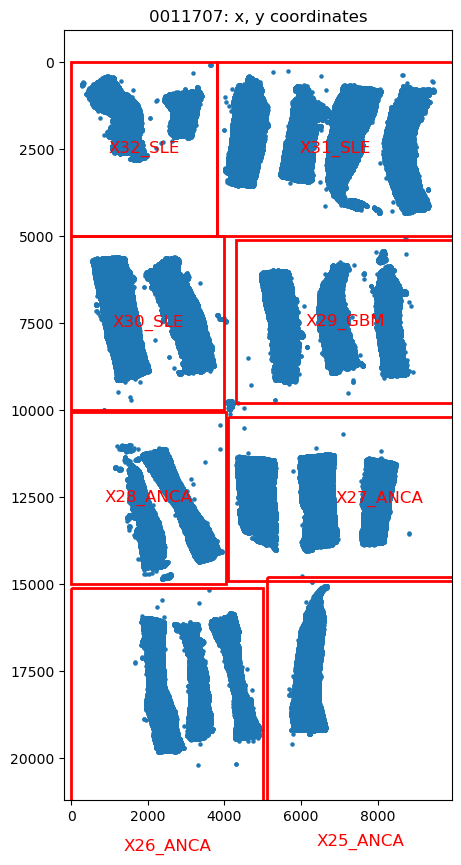

In [12]:
slide_0011707_coordinates = {
    'X25_ANCA': {'xmin': 5100, 'xmax': 10000, 'ymin': 14800, 'ymax': 30000},
    'X26_ANCA': {'xmin': 0,    'xmax': 5000,  'ymin': 15100, 'ymax': 30000},
    'X27_ANCA': {'xmin': 4100, 'xmax': 12000, 'ymin': 10200, 'ymax': 14900},
    'X28_ANCA': {'xmin': 0,    'xmax': 4050,  'ymin': 10050, 'ymax': 15000},
    'X29_GBM':  {'xmin': 4300, 'xmax': 10000, 'ymin': 5100,  'ymax': 9800 },
    'X30_SLE':  {'xmin': 0,    'xmax': 4000,  'ymin': 5000,  'ymax': 10000},
    'X31_SLE':  {'xmin': 3800, 'xmax': 10000, 'ymin': 0,     'ymax': 5000 },
    'X32_SLE':  {'xmin': 0,    'xmax': 3800,  'ymin': 0,     'ymax': 5000 }
}
plot_slide_coordinates_sample_borders(adata, '0011707', slide_0011707_coordinates)


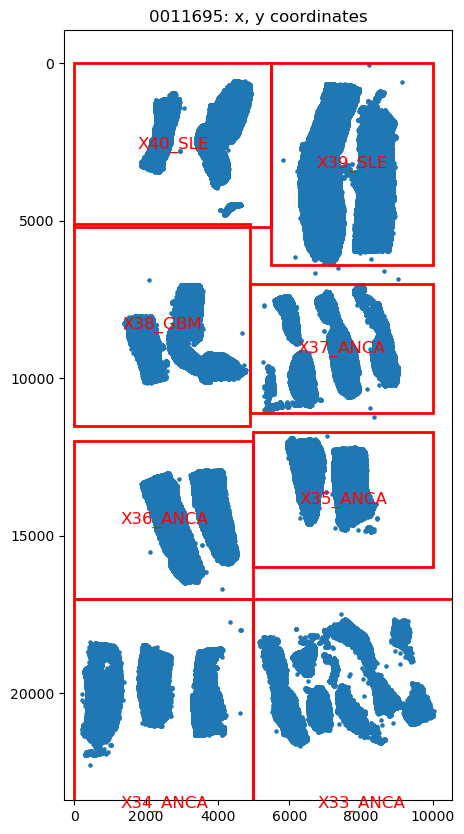

In [13]:
slide_0011695_coordinates = {
    'X33_ANCA': {'xmin': 5000, 'xmax': 11000, 'ymin': 17000, 'ymax': 30000},
    'X34_ANCA': {'xmin': 0,    'xmax': 5000,  'ymin': 17000, 'ymax': 30000},
    'X35_ANCA': {'xmin': 5000, 'xmax': 10000, 'ymin': 11700, 'ymax': 16000},
    'X36_ANCA': {'xmin': 0,    'xmax': 5000,  'ymin': 12000, 'ymax': 17000},
    'X37_ANCA': {'xmin': 4900, 'xmax': 10000, 'ymin': 7000,  'ymax': 11100},
    'X38_GBM':  {'xmin': 0,    'xmax': 4900,  'ymin': 5100,  'ymax': 11500},
    'X39_SLE':  {'xmin': 5500, 'xmax': 10000, 'ymin': 0,     'ymax': 6400 },
    'X40_SLE':  {'xmin': 0,    'xmax': 5500,  'ymin': 0,     'ymax': 5200 }
}

plot_slide_coordinates_sample_borders(adata, '0011695', slide_0011695_coordinates)


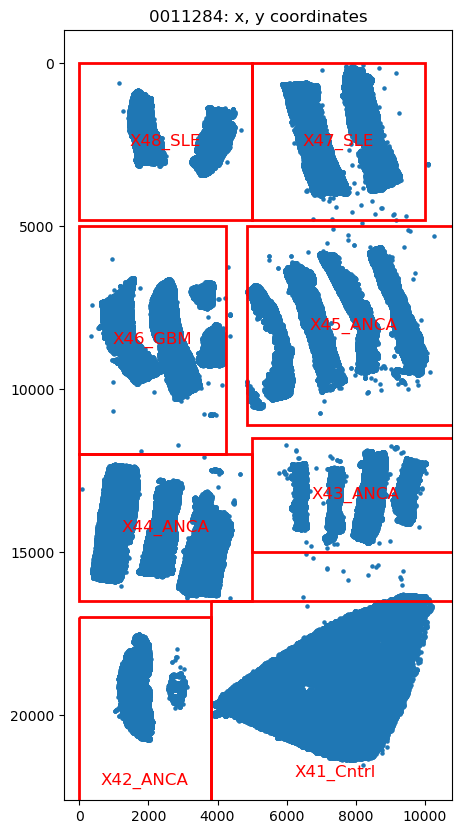

In [14]:
slide_0011284_coordinates = {
    'X41_Cntrl': {'xmin': 3800, 'xmax': 11000, 'ymin': 16500, 'ymax': 27000},
    'X42_ANCA':  {'xmin': 0,    'xmax': 3800,  'ymin': 17000, 'ymax': 27000},
    'X43_ANCA':  {'xmin': 5000, 'xmax': 11000, 'ymin': 11500, 'ymax': 15000},
    'X44_ANCA':  {'xmin': 0,    'xmax': 5000,  'ymin': 12000, 'ymax': 16500},
    'X45_ANCA':  {'xmin': 4850, 'xmax': 11000, 'ymin': 5000,  'ymax': 11100},
    'X46_GBM':   {'xmin': 0,    'xmax': 4250,  'ymin': 5000,  'ymax': 12000},
    'X47_SLE':   {'xmin': 5000, 'xmax': 10000, 'ymin': 0,     'ymax': 4800 },
    'X48_SLE':   {'xmin': 0,    'xmax': 5000,  'ymin': 0,     'ymax': 4800 }
}
plot_slide_coordinates_sample_borders(adata, '0011284', slide_0011284_coordinates)


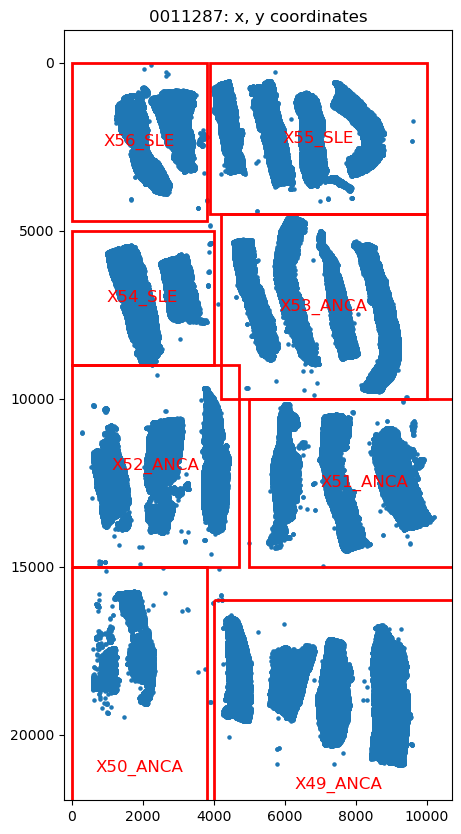

In [15]:
slide_0011287_coordinates = {
    'X49_ANCA': {'xmin': 4000, 'xmax': 11000, 'ymin': 16000, 'ymax': 27000},
    'X50_ANCA': {'xmin': 0,    'xmax': 3800,  'ymin': 15000, 'ymax': 27000},
    'X51_ANCA': {'xmin': 5000, 'xmax': 11500, 'ymin': 10000, 'ymax': 15000},
    'X52_ANCA': {'xmin': 0,    'xmax': 4700,  'ymin': 9000,  'ymax': 15000},
    'X53_ANCA': {'xmin': 4200, 'xmax': 10000, 'ymin': 4500,  'ymax': 10000 },
    'X54_SLE':  {'xmin': 0,    'xmax': 4000,  'ymin': 5000,  'ymax': 9000 },
    'X55_SLE':  {'xmin': 3900, 'xmax': 10000, 'ymin': 0,     'ymax': 4500 },
    'X56_SLE':  {'xmin': 0,    'xmax': 3800,  'ymin': 0,     'ymax': 4700 }
}

plot_slide_coordinates_sample_borders(adata, '0011287', slide_0011287_coordinates)


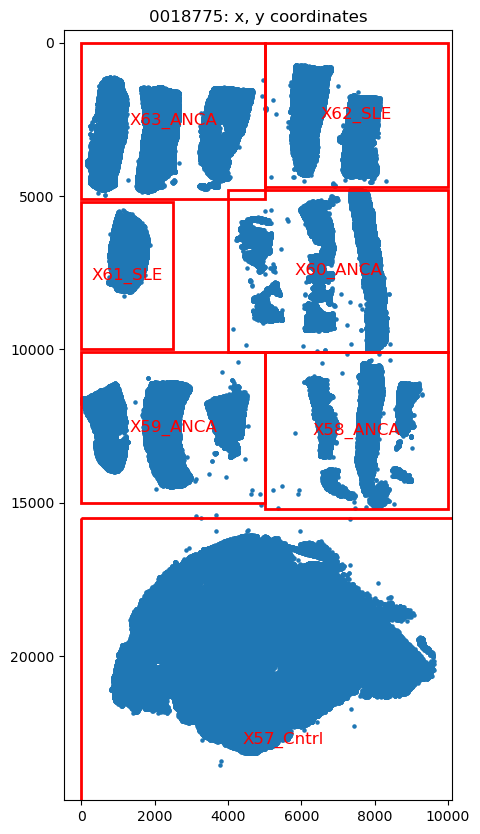

In [16]:
slide_0018775_coordinates = {
    'X57_Cntrl': {'xmin': 0,    'xmax': 11000, 'ymin': 15500, 'ymax': 30000},
    'X58_ANCA':  {'xmin': 5000, 'xmax': 10000, 'ymin': 10100, 'ymax': 15200},
    'X59_ANCA':  {'xmin': 0,    'xmax': 5000,  'ymin': 10100, 'ymax': 15000},
    'X60_ANCA':  {'xmin': 4000, 'xmax': 10000, 'ymin': 4800,  'ymax': 10100},
    'X61_SLE':   {'xmin': 0,    'xmax': 2500,  'ymin': 5200,  'ymax': 10000},
    'X62_SLE':   {'xmin': 5000, 'xmax': 10000, 'ymin': 0,     'ymax': 4700 },
    'X63_ANCA':  {'xmin': 0,    'xmax': 5000,  'ymin': 0,     'ymax': 5100 }
}

plot_slide_coordinates_sample_borders(adata, '0018775', slide_0018775_coordinates)


In [17]:
# Combine all slide dictionaries into one

sample_coordinates = {
    '0011762': slide_0011762_coordinates,
    '0011546': slide_0011546_coordinates,
    '0011216': slide_0011216_coordinates,
    '0011707': slide_0011707_coordinates,
    '0011695': slide_0011695_coordinates,
    '0011284': slide_0011284_coordinates,
    '0011287': slide_0011287_coordinates,
    '0018775': slide_0018775_coordinates
}


# Function to add Patient_Sample_ID based on coordinates
def annotate_patient_sample(data, slide_id, sample_name, coords):
    xmin = coords['xmin']
    xmax = coords['xmax']
    ymin = coords['ymin']
    ymax = coords['ymax']
    
    # Create the sub_mask based on the coordinates
    sub_mask = ((data.obs["x_centroid"] >= xmin) & 
                (data.obs["x_centroid"] < xmax) & 
                (data.obs["y_centroid"] >= ymin) & 
                (data.obs["y_centroid"] < ymax) & 
                (data.obs["Slide_ID"] == slide_id))
    
    # Annotate the Patient_Sample_ID for the cells within the ROI
    data.obs.loc[sub_mask, 'Patient_Sample_ID'] = sample_name


In [18]:
# Initialize a column to store the sample annotation.
# Start with a default value, 'Not_In_Sample'.
adata.obs['Patient_Sample_ID'] = 'Not_In_Sample'

# Iterate over each Slide_ID and apply the annotation for each sample
for slide_id, coordinates in sample_coordinates.items():
    for sample_name, coords in coordinates.items():
        annotate_patient_sample(adata, slide_id, sample_name, coords)

In [19]:
adata.obs.head()

,x,y,z,cluster,n_transcripts,density,elongation,area,avg_confidence,avg_assignment_confidence,max_cluster_frac,lifespan,x_centroid,y_centroid,cell_area,Slide_ID,batch,Patient_Sample_ID
cell_CRfb095a77d-1,2285.790178,1164.057381,32.829188,1,79,2.024,2.141,39.03,0.9975,0.9916,0.949367,50,2285.790178,1164.057381,39.03,0011695,0,X40_SLE
cell_CRfb095a77d-2,2298.342622,1219.741069,31.465535,4,32,1.085,4.614,29.50,0.9771,0.9288,1.000000,50,2298.342622,1219.741069,29.50,0011695,0,X40_SLE
cell_CRfb095a77d-3,2271.434052,1245.859500,32.062796,2,67,3.059,2.990,21.90,0.9971,0.9884,0.880597,50,2271.434052,1245.859500,21.90,0011695,0,X40_SLE
cell_CRfb095a77d-5,2257.346907,1259.955827,31.273945,2,56,2.142,9.229,26.14,0.9964,0.9707,0.767857,50,2257.346907,1259.955827,26.14,0011695,0,X40_SLE
cell_CRfb095a77d-6,2277.712022,1237.595244,35.395148,2,9,1.698,3.283,5.30,0.9826,0.9400,0.888889,50,2277.712022,1237.595244,5.30,0011695,0,X40_SLE


In [20]:
Samples_Annotated = adata.obs.Patient_Sample_ID.unique()
Samples_Annotated

array(['X40_SLE', 'X39_SLE', 'X38_GBM', 'X37_ANCA', 'Not_In_Sample',
       'X36_ANCA', 'X35_ANCA', 'X34_ANCA', 'X33_ANCA', 'X63_ANCA',
       'X61_SLE', 'X62_SLE', 'X60_ANCA', 'X59_ANCA', 'X58_ANCA',
       'X57_Cntrl', 'X32_SLE', 'X31_SLE', 'X30_SLE', 'X29_GBM',
       'X28_ANCA', 'X27_ANCA', 'X26_ANCA', 'X25_ANCA', 'X56_SLE',
       'X55_SLE', 'X54_SLE', 'X53_ANCA', 'X52_ANCA', 'X50_ANCA',
       'X51_ANCA', 'X49_ANCA', 'X8_SLE', 'X7_SLE', 'X6_ANCA', 'X4_ANCA',
       'X5_GBM', 'X2_Cntrl', 'X3_ANCA', 'X1_Cntrl', 'X48_SLE', 'X47_SLE',
       'X46_GBM', 'X45_ANCA', 'X44_ANCA', 'X43_ANCA', 'X42_ANCA',
       'X41_Cntrl', 'X16_SLE', 'X15_SLE', 'X14_ANCA', 'X12_ANCA',
       'X13_GBM', 'X11_ANCA', 'X10_Cntrl', 'X9_Cntrl', 'X24_SLE',
       'X23_SLE', 'X22_SLE', 'X21_GBM', 'X20_ANCA', 'X19_ANCA',
       'X18_ANCA', 'X17_ANCA'], dtype=object)

In [21]:
len(Samples_Annotated)

64

In [22]:
adata.write("./output_dataobjects/merged_raw_SamplesAnnotated.h5ad")